# MP Likelihood profile code tests

This code uses MontePython to run a likelihood profile iteration with much the same logic as the Cobaya version. The primary difference in logic is the minimiser algorithm employed - here, we use the approach defined in [2107.10291](https://inspirehep.net/literature/1890425) based on iteratively running an MCMC per point, tweaking the crieteria for acceptance of a point and the proposed step size. 

**This code is being actively developed and is not ready for use yet**.

In [1]:
from MP_classes_lkl_prof_functions import *

In [2]:
# test = lkl_prof('/home2/karwal/lkl_prof/lcdm_mp_mcmc/', 'lcdm_mp_mcmc', 'H0')
# test.prof_incr = -0.1
# test.prof_max = 72.
# test.prof_min = 65.
# test.processes = 2

test = lkl_prof('/home2/karwal/mcmc_chains/s12_chains/', 's12_chains', 'fraction_axion_ac')
test.prof_incr = 0.01
test.prof_max = 0.17
test.prof_min = 0.05
test.processes = 2

In [3]:
test.check_mcmc_chains(read_all_chains=True)

check_mcmc_chains: Looking for files: /home2/karwal/mcmc_chains/s12_chains/2022-08-23_1000000_
check_mcmc_chains: Reading all chains:
2022-08-23_1000000__4.txt
2022-08-23_1000000__6.txt
2022-08-23_1000000__1.txt
2022-08-23_1000000__2.txt
2022-08-23_1000000__3.txt
2022-08-23_1000000__5.txt
2022-08-23_1000000__4.txt
2022-08-23_1000000__6.txt
2022-08-23_1000000__1.txt
2022-08-23_1000000__2.txt
2022-08-23_1000000__3.txt
2022-08-23_1000000__5.txt
Removed 0.3 as burn in


True

In [4]:
test.check_mcmc_convergence()

check_mcmc_convergence: Chains not converged. Current R-1 = 4.804 while R-1 wanted = 0.050. 
Resume MCMC. 


False

In [5]:
# test.mcmc()

In [6]:
test.global_min(run_glob_min=False, N_min_steps=10);

check_global_min: Found minimum with file name s12_chains
match_param_names: Params match - the recorded params contain the same params as param_names passed. 


In [7]:
test.global_ML;

In [8]:
test.param_order;

In [9]:
test.init_lkl_prof()

mkdir: cannot create directory ‘lkl_prof_+fraction_axion_ac/’: File exists


0.17279550000000005

In [ ]:
# test.run_lkl_prof(time_mins=True,N_min_steps=10)

### Check output

In [10]:
lkl_prof_output = test.full_lkl_prof_dict()

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
x = lkl_prof_output['f_ede']
y = lkl_prof_output['-logLike']

In [13]:
quad = np.polyfit(x, y, deg=2)

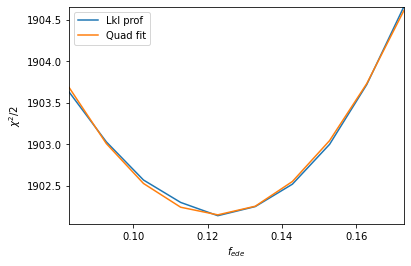

In [14]:
plt.plot(x, y, label="Lkl prof")
plt.plot(x, quad[0]*x*x + quad[1]*x + quad[2], label="Quad fit")

plt.ylabel(r'$\chi^2/2$')
plt.xlabel(r'$f_{ede}$')
plt.xlim([min(x), max(x)])
plt.ylim([min(y)-0.1, max(y)])
plt.legend()
plt.show()

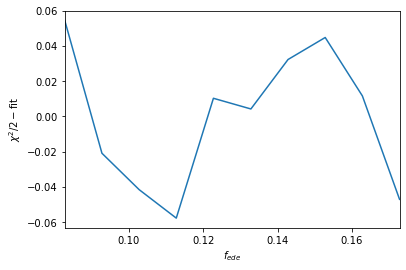

In [15]:
plt.plot(x, quad[0]*x*x + quad[1]*x + quad[2] -y, label="Quad fit difference")
plt.ylabel(r'$\chi^2/2 - $fit')
plt.xlabel(r'$f_{ede}$')
plt.xlim([min(x), max(x)])
# plt.ylim([min(y)-0.1, max(y)])
plt.show()

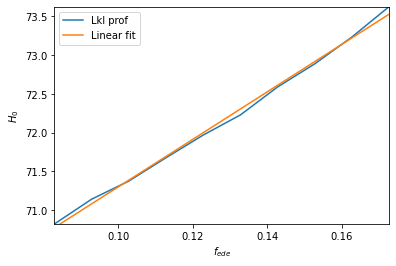

In [20]:
x = lkl_prof_output['f_ede']
y = lkl_prof_output['H0']

plt.plot(x, y, label='Lkl prof')

quad = np.polyfit(x, y, deg=1)
plt.plot(x, quad[0]*x + quad[1], label="Linear fit")


plt.ylabel(r'$H_0$')
plt.xlabel(r'$f_{ede}$')
plt.xlim([min(x), max(x)])
plt.ylim([min(y), max(y)])
plt.legend()
plt.show()

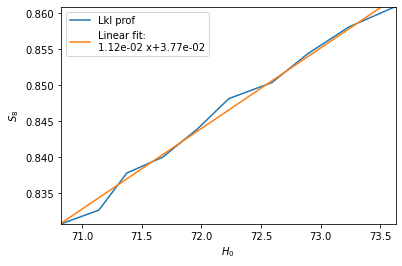

In [26]:
x = lkl_prof_output['H0']
y = lkl_prof_output['sigma8']*(lkl_prof_output['Omega_m']/0.3)**0.5

plt.plot(x, y, label='Lkl prof')

quad = np.polyfit(x, y, deg=1)
plt.plot(x, quad[0]*x + quad[1], label="Linear fit:\n{m:.2e} x+{c:.2e}".format(m=quad[0], c=quad[1]))


plt.ylabel(r'$S_8$')
plt.xlabel(r'$H_0$')
plt.xlim([min(x), max(x)])
plt.ylim([min(y), max(y)])
plt.legend()
plt.show()

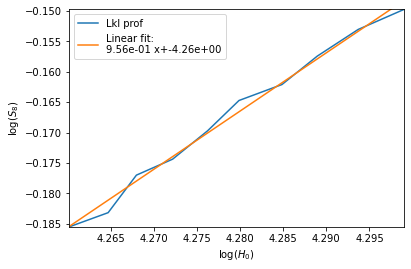

In [28]:
x = np.log(lkl_prof_output['H0'])
y = np.log(lkl_prof_output['sigma8']*(lkl_prof_output['Omega_m']/0.3)**0.5)

plt.plot(x, y, label='Lkl prof')

quad = np.polyfit(x, y, deg=1)
plt.plot(x, quad[0]*x + quad[1], label="Linear fit:\n{m:.2e} x+{c:.2e}".format(m=quad[0], c=quad[1]))


plt.ylabel(r'$\log(S_8)$')
plt.xlabel(r'$\log(H_0)$')
plt.xlim([min(x), max(x)])
plt.ylim([min(y), max(y)])
plt.legend()
plt.show()

In [27]:
lkl_prof_output;